# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     |Camila Daniela Zapata Castañeda   |
| **Fecha**      |30 de Enero del 2025   |
| **Expediente** |745624   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [4]:
import pandas as pd
import numpy as np

In [5]:
de = pd.read_csv("Advertising.csv")

In [6]:
de.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


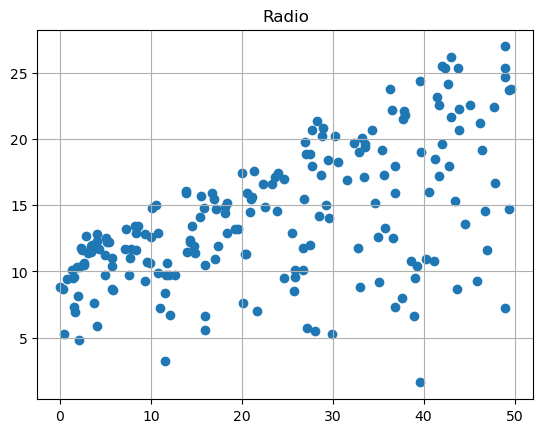

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title("Radio")
plt.scatter(de["radio"], de["sales"])
plt.grid()

**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

Si hay una relación clara entre el presupuesto para publicidad y las ventas, sobre todo se nota con la TV y la radio.
Entre mayor sea el presupuesto mayor son las ventas que se generan. 

Es importante establecer si hay una relación o no ya que si no tiene un impacto significativo en las ventas no vale la pena seguir invirtiendo en ellos y es hora de explorar nuevos métodos para conseguir publicidad y por ende ventas. 

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Qué tan fuerte es la relación se vería más clarmente ya con los coeficientes de la pendiente. Pero a simple vista tanto radio como Tv tienen una fuerte relación con ventas. Ahora esto nos sirve para tomar buenas decisiones ya que vemos cuales métodos de publicidad son los que nos están sirviendo y cuales no nos están generando nada de ventas.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
def regression(df, col_n_x, col_n_y, degree):

    x = np.reshape(df[col_n_x].values, [-1,1])
    y = np.reshape(df[col_n_y].values, [-1,1])
    
    
    X = x.copy()
    for i in range (2, degree+1):
        X = np.hstack((X, x**i))

    model = LinearRegression()
    model = model.fit(X, y)

    intercept = model.intercept_
    coef = model.coef_
    r2 = model.score(X,y)
    y_pred = model.predict(X)
    
    print("r2 = ",r2)
    print('Intercepto: ', intercept[0])
    print('Coeficiente: ', coef[0])
    
    #gráfica
    plt.figure()
    plt.scatter(x, y)
    plt.grid()
    plt.scatter(x, y_pred, color = 'purple', label="predicción")
    plt.xlabel(col_n_x)
    plt.ylabel(col_n_y)  
    plt.title(f"Regresión lineal de grado {degree}")
    plt.legend(loc="best")

r2 =  0.611875050850071
Intercepto:  7.0325935491276965
Coeficiente:  [0.04753664]


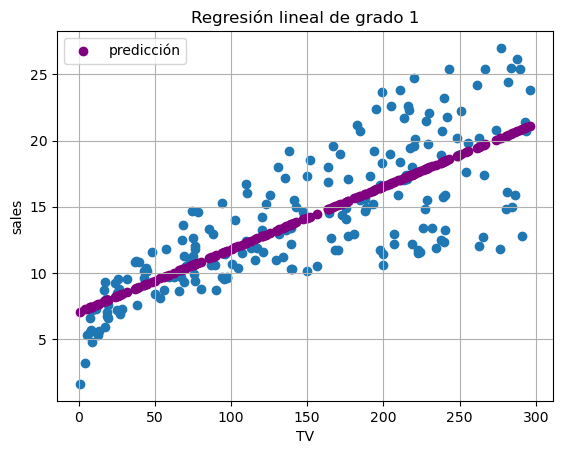

In [10]:
regression(de, "TV", "sales", 1)

r2 =  0.33203245544529525
Intercepto:  9.311638095158283
Coeficiente:  [0.20249578]


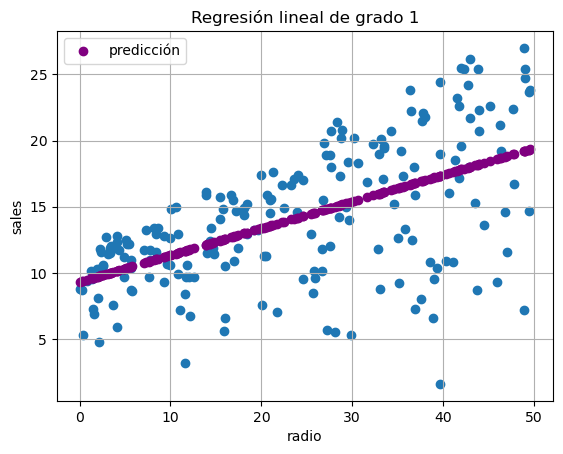

In [11]:
regression(de, "radio", "sales", 1)

r2 =  0.05212044544430516
Intercepto:  12.351407069278162
Coeficiente:  [0.0546931]


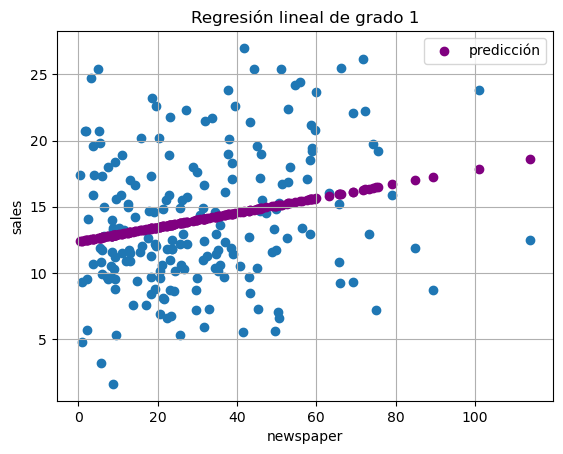

In [12]:
regression(de, "newspaper", "sales", 1)

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La población es infinita, vaya es el todo y como no podemos medirla es imposible sacar los valores exactos de esta.

La muestra es una porción de la población, la cual si es medible y según la calidad de la muestra vamos a poder encontrar valores que si tengan una similitud a los de la población. 

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Una regresión con todos los datos pues tendría infinitos "n" por ende sería precisa, pero como no tenemos manera de recolectar datos infinitos no podemos hacer una regresión de la población, al contrario de la muestra que según su tamaño es mejor la aproximación a la población. 

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [13]:
linreg = LinearRegression()

### TV (Error estandar de los Coeficientes)

In [14]:
x_columnTV = np.reshape(de["TV"].values, [-1,1])
y_columnTV = np.reshape(de["sales"].values, [-1,1])

In [15]:
linreg.fit(x_columnTV, y_columnTV)
y_predTV = linreg.predict(x_columnTV)
RSSTV = np.sum((y_predTV - y_columnTV)**2)
n = len(y_columnTV)
sigTV = RSSTV/(n-2)

#### TV_B0

In [16]:
SEB0TV = sigTV*((1/n)+x_columnTV.mean()**2/np.sum((x_columnTV - x_columnTV.mean())**2))
SEB0TV

0.209620157958264

#### TV_B1

In [17]:
SEB1TV = sigTV/np.sum((x_columnTV - x_columnTV.mean())**2)
SEB1TV

7.2393670390241845e-06

### radio (Error estandar de los coeficientes)

In [18]:
x_columnRA = np.reshape(de["radio"].values, [-1,1])
y_columnRA = np.reshape(de["sales"].values, [-1,1])

In [19]:
linreg.fit(x_columnRA, y_columnRA)
y_predRA = linreg.predict(x_columnRA)
RSSRA = np.sum((y_predRA - y_columnRA)**2)
n = len(y_columnRA)
sigRA = RSSRA/(n-2)

#### ra_B0

In [20]:
SEB0RA = sigRA*((1/n)+x_columnRA.mean()**2/np.sum((x_columnRA - x_columnRA.mean())**2))
SEB0RA

0.3168569687031188

#### ra_B1

In [21]:
SEB1RA = sigRA/np.sum((x_columnRA - x_columnRA.mean())**2)
SEB1RA

0.00041662142732547643

### newspaper (Error estandar de los coeficientes)

In [22]:
x_columnNEW = np.reshape(de["newspaper"].values, [-1,1])
y_columnNEW = np.reshape(de["sales"].values, [-1,1])

In [23]:
linreg.fit(x_columnNEW, y_columnNEW)
y_predNEW = linreg.predict(x_columnNEW)
RSSNEW = np.sum((y_predNEW - y_columnNEW)**2)
n = len(y_columnNEW)
sigNEW = RSSNEW/(n-2)

#### news_B0

In [24]:
SEB0NEW = sigNEW*((1/n)+x_columnNEW.mean()**2/np.sum((x_columnNEW - x_columnNEW.mean())**2))
SEB0NEW

0.3861630495685448

#### news_B1

In [25]:
SEB1NEW = sigNEW/np.sum((x_columnNEW - x_columnNEW.mean())**2)
SEB1NEW

0.0002747545557223786

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

### Intervalos de confianza de la TV

In [26]:
tv0 = 7.032593
tv1 = 0.047536

#### TV_B0 (Upper)

In [56]:
UTV0 = tv0 + 2*np.sqrt(SEB0TV)
UTV0

7.948278880546957

#### TV_B0 (Lower)

In [57]:
LTV0 = tv0 - 2*np.sqrt(SEB0TV)
LTV0

6.116907119453043

#### TV_B1 (Upper)

In [58]:
UTV1 = tv1 + 2*np.sqrt(SEB1TV)
UTV1

0.05291721437559374

#### TV_B1 (Lower)

In [59]:
LTV1 = tv1 - 2*np.sqrt(SEB1TV)
LTV1

0.04215478562440626

### Intervalos de confianza de la radio

In [31]:
ra0 = 9.311638095158283
ra1 = 0.20249578

#### ra_B0 (Upper)

In [62]:
URA0 = ra0 + 2*np.sqrt(SEB0RA)
URA0

10.437439087702025

#### ra_B0 (Lower)

In [63]:
LRA0 = ra0 - 2*np.sqrt(SEB0RA)
LRA0

8.185837102614542

#### ra_B1 (Upper)

In [64]:
URA1 = ra1 + 2*np.sqrt(SEB1RA)
URA1

0.24331839272018124

#### ra_B1 (Lower)

In [65]:
LRA1 = ra1 - 2*np.sqrt(SEB1RA)
LRA1

0.16167316727981873

### Intervales de confianza del periódico 

In [36]:
new0 = 12.351407069278162
new1 = 0.0546931

#### new_B0 (Upper)

In [67]:
UNEW0 = new0 + 2*np.sqrt(SEB0NEW)
UNEW0

13.59424744449703

#### new_B0 (Lower)

In [68]:
LNEW0 = new0 - 2*np.sqrt(SEB0NEW)
LNEW0

11.108566694059293

#### new_B1 (Upper)

In [69]:
UNEW1 = new1 + 2*np.sqrt(SEB1NEW)
UNEW1

0.08784454375271633

#### new_B1 (Lower)

In [70]:
LNEW1 = new1 - 2*np.sqrt(SEB1NEW)
LNEW1

0.021541656247283672

Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

Hipótesis nula: Es el escenario contrario al de la hipostesis alternativa, lo que no quieres o sospechas que pase. Y es la que tratamos de probar verdadera.

Hipótesis alternativa: Es lo que quieres o sospechas que pase, y se considera si hay suficiente evidencia para rechazar H₀.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

### TV estadístico t

#### B0t

In [41]:
t0TV = (tv0)/(np.sqrt(SEB0TV))
t0TV

15.360273974737485

#### B1t

In [42]:
t1TV = (tv1)/(np.sqrt(SEB1TV))
t1TV

17.667387575413244

### Radio estadístico t

#### B0t

In [43]:
t0RA = (ra0)/(np.sqrt(SEB0RA))
t0RA

16.542245311258217

#### B1t

In [44]:
t1RA = (ra1)/(np.sqrt(SEB1RA))
t1RA

9.920765306621012

### Periodíco estadístico t

#### B0t

In [45]:
t0NEW = (new0)/(np.sqrt(SEB0NEW))
t0NEW

19.87609562024895

#### B1t

In [46]:
t1NEW = (new1)/(np.sqrt(SEB1NEW))
t1NEW

3.299590835799941

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [47]:
from scipy import stats

p = 2
# P = 2, por que son dos factores B0 y B1

### p-value de la TV

In [48]:
p_b0TV = 2*(1 - stats.t.cdf(np.abs(t0TV), n-p))
p_b0TV

0.0

In [49]:
p_b1TV = 2*(1 - stats.t.cdf(np.abs(t1TV), n-p))
p_b1TV

0.0

### p-value radio

In [50]:
p_b0RA = 2*(1 - stats.t.cdf(np.abs(t0RA), n-p))
p_b0RA

0.0

In [51]:
p_b1RA = 2*(1 - stats.t.cdf(np.abs(t1RA), n-p))
p_b1RA

0.0

### p-value newspaper

In [52]:
p_b0NEW = 2*(1 - stats.t.cdf(np.abs(t0NEW), n-p))
p_b0NEW

0.0

In [53]:
p_b1NEW = 2*(1 - stats.t.cdf(np.abs(t1NEW), n-p))
p_b1NEW

0.0011481955116945386

¿Se rechaza la hipótesis nula? ¿Qué significa?

El p-value es la probabilidad de que tu resultado de la significancia de los factores (coeficientes) y el modelo sea un chiripaso. En otras palabras que los resultados hayan sido por pura suerte. Y como en este caso el p_value tuvo valores muy pequeños nos da a entender que los resultados si serían exactos y no solo coincidencia. 

### Observaciones TV

In [60]:
print ("r2 =  0.611875050850071")
print("Intercepto =  7.0325935491276965")
print("Coeficiente =  0.04753664")
print("Error Estandar B0 = ", SEB0TV)
print("Error Estandar B1 = ", SEB1TV)
print("Intervalo de Confiaza Upper B0", UTV0, "Intervalo de confianza Lower B0", LTV0)
print("Intervalo de Confiaza Upper B1", UTV1, "Intervalo de confianza Lower B0", LTV1)
print("Estadístico de Confianza B0 = ", t0TV)
print("Estadístico de Confianza B1 = ", t1TV)
print("p_value0 = ", p_b0TV)
print("p_value1 = ", p_b1TV)

r2 =  0.611875050850071
Intercepto =  7.0325935491276965
Coeficiente =  0.04753664
Error Estandar B0 =  0.209620157958264
Error Estandar B1 =  7.2393670390241845e-06
Intervalo de Confiaza Upper B0 7.948278880546957 Intervalo de confianza Lower B0 6.116907119453043
Intervalo de Confiaza Upper B1 0.05291721437559374 Intervalo de confianza Lower B0 0.04215478562440626
Estadístico de Confianza B0 =  15.360273974737485
Estadístico de Confianza B1 =  17.667387575413244
p_value0 =  0.0
p_value1 =  0.0


El **61%** de la varianza la explica el modelo. Si no se invierte nada en tele tendríamos **7.032** ventas y por cada unidad que gastemos en TV aumentarían nuestras ventas un **0.047**. Los errores estandar son pequeños por ende el modelo es confiable. Los intervalos de confianza no pasan por el cero lo que nos habla que son significativos pero vemos que el de B0 es más significativo que el de B1. Y por último como los p_value de ambos están muy cerca del cerco podemos decir que son confiables los resultados que obtuvimos

### Observaciones radio

In [66]:
print ("r2 =  0.33203245544529525")
print("Intercepto =  9.311638095158283")
print("Coeficiente =  0.20249578")
print("Error Estandar B0 = ", SEB0RA)
print("Error Estandar B1 = ", SEB1RA)
print("Intervalo de Confiaza Upper B0", URA0, "Intervalo de confianza Lower B0", LRA0)
print("Intervalo de Confiaza Upper B1", URA1, "Intervalo de confianza Lower B0", LRA1)
print("Estadístico de Confianza B0 = ", t0RA)
print("Estadístico de Confianza B1 = ", t1RA)
print("p_value0 = ", p_b0RA)
print("p_value1 = ", p_b1RA)

r2 =  0.33203245544529525
Intercepto =  9.311638095158283
Coeficiente =  0.20249578
Error Estandar B0 =  0.3168569687031188
Error Estandar B1 =  0.00041662142732547643
Intervalo de Confiaza Upper B0 10.437439087702025 Intervalo de confianza Lower B0 8.185837102614542
Intervalo de Confiaza Upper B1 0.24331839272018124 Intervalo de confianza Lower B0 0.16167316727981873
Estadístico de Confianza B0 =  16.542245311258217
Estadístico de Confianza B1 =  9.920765306621012
p_value0 =  0.0
p_value1 =  0.0


El **33%** de la varianza la explica el modelo. Si no se invierte nada en radio tendríamos **9.311** ventas y por cada unidad que gastemos en radio se aumentarían nuestras ventas un **0.202**. Los errores estandar son pequeños por ende el modelo es confiable. Los intervalos de confianza no pasan por el cero lo que nos habla que son significativos pero vemos que el de B0 es más significativo que el de B1. Y por último como los p_value de ambos están muy cerca del cerco podemos decir que son confiables los resultados que obtuvimos

### Observaciones newspaper

In [71]:
print ("r2 =  0.05212044544430516")
print("Intercepto =  12.351407069278162")
print("Coeficiente =  0.0546931")
print("Error Estandar B0 = ", SEB0NEW)
print("Error Estandar B1 = ", SEB1NEW)
print("Intervalo de Confiaza Upper B0", UNEW0, "Intervalo de confianza Lower B0", LNEW0)
print("Intervalo de Confiaza Upper B1", UNEW1, "Intervalo de confianza Lower B0", LNEW1)
print("Estadístico de Confianza B0 = ", t0NEW)
print("Estadístico de Confianza B1 = ", t1NEW)
print("p_value0 = ", p_b0NEW)
print("p_value1 = ", p_b1NEW)

r2 =  0.05212044544430516
Intercepto =  12.351407069278162
Coeficiente =  0.0546931
Error Estandar B0 =  0.3861630495685448
Error Estandar B1 =  0.0002747545557223786
Intervalo de Confiaza Upper B0 13.59424744449703 Intervalo de confianza Lower B0 11.108566694059293
Intervalo de Confiaza Upper B1 0.08784454375271633 Intervalo de confianza Lower B0 0.021541656247283672
Estadístico de Confianza B0 =  19.87609562024895
Estadístico de Confianza B1 =  3.299590835799941
p_value0 =  0.0
p_value1 =  0.0011481955116945386


El **5.21%** de la varianza la explica el modelo. Si no se invierte nada en radio tendríamos **12.35** ventas (el más alto de los tres) y por cada unidad que gastemos en radio se aumentarían nuestras ventas un **0.05**. Los errores estandar son pequeños en relación a los valores de del intercepto y coeficiente, por ende el modelo es confiable. Los intervalos de confianza no pasan por el cero lo que nos habla que son significativos pero vemos que el de B0 es más significativo que el de B1. Y por último como los p_value de ambos están muy cerca del cerco podemos decir que son confiables los resultados que obtuvimos

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión -
- Coeficientes estimados -
- Errores estándar de los coeficientes -
- Intervalos de confianza -
- Estadísticos t -
- p-values
- Observaciones

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [73]:
import statsmodels.api as sm
xtv = np.reshape(de["TV"].values, [-1, 1])
xra = np.reshape(de["radio"].values, [-1, 1])
xpe = np.reshape(de["newspaper"].values, [-1, 1])
ones = np.ones([n, 1])
X = np.hstack((ones, xtv, xra, xpe))
ols = sm.OLS(y_columnTV, X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        11:42:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
import statsmodels.api as sm
xtv = np.reshape(de["TV"].values, [-1, 1])
ones = np.ones([n, 1])
X = np.hstack((ones, xtv))
ols = sm.OLS(y_columnTV, X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           1.47e-42
Time:                        11:44:00   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
x1             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
import statsmodels.api as sm
xra = np.reshape(de["radio"].values, [-1, 1])
ones = np.ones([n, 1])
X = np.hstack((ones, xra))
ols = sm.OLS(y_columnRA, X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           4.35e-19
Time:                        11:45:35   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3116      0.563     16.542      0.000       8.202      10.422
x1             0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
import statsmodels.api as sm
xnew = np.reshape(de["newspaper"].values, [-1, 1])
ones = np.ones([n, 1])
X = np.hstack((ones, xnew))
ols = sm.OLS(y_columnRA, X)
results = ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Tue, 04 Feb 2025   Prob (F-statistic):            0.00115
Time:                        11:46:46   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
x1             0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

En el caso de la regresión múltiple se observa que el p_value de "newspaper" es cercano a 1, eso nos dice que los resultados obtenidos o las aproximaciones que hicimos fueron pura coincidencia y que realmente no aporta información relevante al modelo. Esto llega a ser un poco contradictorio ya que cuando hicimos la regresión simple del newspaper nos salió que si tenia una gran significacia pero en la múltiple no, esto seguramente se debe a una correlación entre el newspaper y algún otro factor de la regresión múltiple. 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*